## CUSTOMER CHURN PREDICTION

In [40]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [9]:
# IMPORTING DATA
df= pd.read_csv("../data/Telco-Customer-Churn.csv")
print(df.shape)
print(df.head)

(7043, 21)
<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service        

In [10]:
# Initial exploration of the data
df.info()                                         # Finds the column names, data types, and missing values
df.describe()                                     # Provides MIN, MAX, MEAN
df.isnull().sum()                                 # Counts missing values in each column
df['Churn'].value_counts(normalize=True)*100      # Shows the churn percentage

# USE CASE - Provides data quality info and target variable balance (Base for modeling)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

### Need for data cleaning?
#### Data must be clean before modeling, missing values and irrelevant features can lower the efficiency of our model later on

In [ ]:
# DATA CLEANING

df.replace(" ", np.nan, inplace=True)                                    # Replaces empty spaces wth Nan
df['TotalCharge'] = pd.to_numeric(df['TotalCharge'], errors='coerce')    # Converts the TotalCharges column to numbers where applicable
df.dropna(subset=['TotalCharge'], inplace=True)                          # removes rows with missing values in TotalCharges
df.drop(columns=['customerID'], inplace=True)                            # removes customerID (Not essential for making predictions)

In [14]:
df.to_csv("../data/clean_telco.csv", index=False)   # Saves the clean data to our CSV file

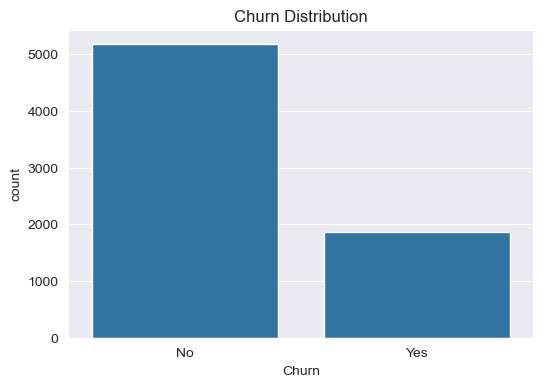

In [15]:
# Visualization of Dataset
plt.figure(figsize=(6,4))
sns.countplot(x= 'Churn', data=df)
plt.title('Churn Distribution')
plt.show()

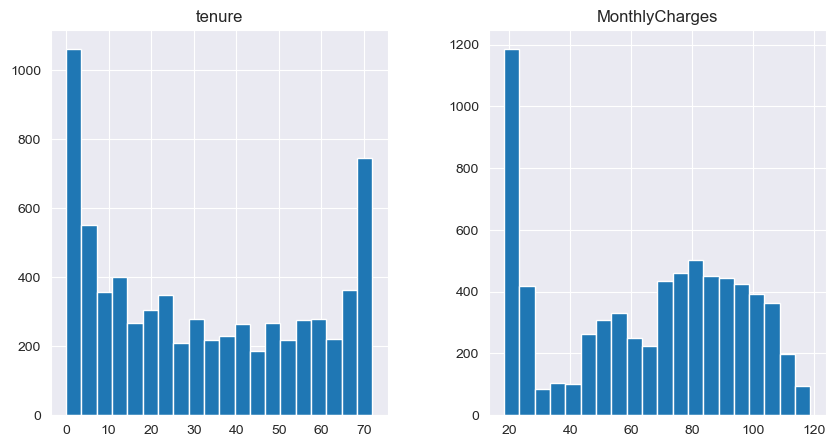

In [16]:
# Creating a histogram to represent the numerical values
num_cols = ['tenure','MonthlyCharges','TotalCharges']
df[num_cols].hist(bins=20, figsize=(10,5))
plt.show()

#### Bivariate Analysis
##### Plots churn vs contract type

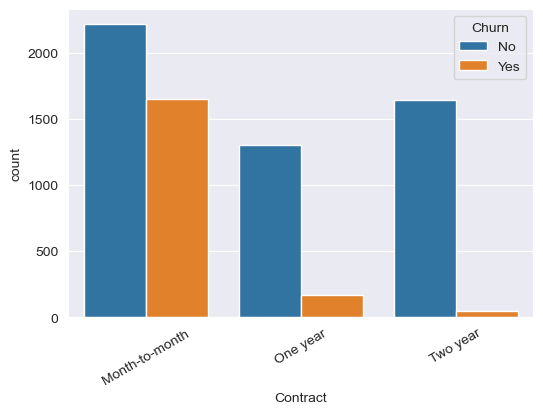

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x= 'Contract', hue='Churn', data=df)
plt.xticks(rotation=30)
plt.show()

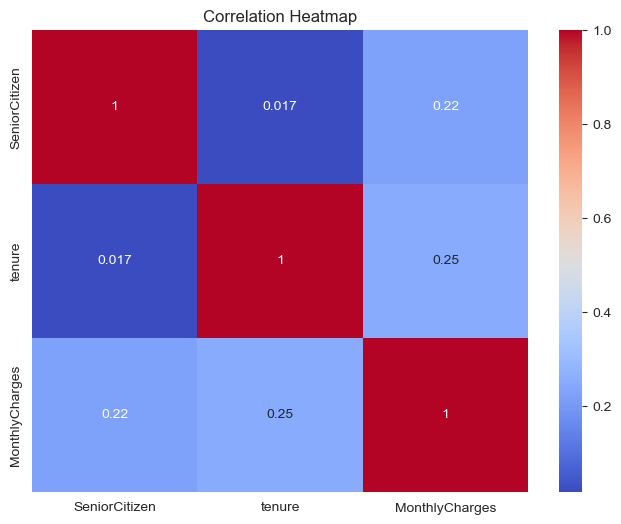

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

### IN DEPTH DATA CLEANING
#### *IMPLEMENTED PROCEDURES*
##### 1. Handle Missing Data
######  - Drop columns with too many missing values
######  - Adding *median/mean* numeric values for missing numeric columns
######  - Adding most common categories to any missing categorical values

##### 2. Converting Categorical Features
######  - Use of *Label Encoding* (for binary categories)
######  - Use of *One-hot Encoding* (for multi-category)

##### 3. Convert *Target Table*
##### 4. Scale Numerical Features

In [42]:
data = df.copy()

#FILLS OUT ALL THE MISSING VALUES
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0])
    else:
        data[col].fillna(data[col].median())

# ENCODING CATEGORICAL VARIABLES
label_enc= LabelEncoder()
data['Churn'] = label_enc.fit_transform(data['Churn'])  # Yes = 1, No = 0

# ONE-HOT ENCODING: Categorical variables
data = pd.get_dummies(data, drop_first=True)

print("DATA AFTER PREPROCESSING", data.head())






DATA AFTER PREPROCESSING    SeniorCitizen  tenure  MonthlyCharges  Churn  customerID_0003-MKNFE  \
0              0       1           29.85      0                  False   
1              0      34           56.95      0                  False   
2              0       2           53.85      1                  False   
3              0      45           42.30      0                  False   
4              0       2           70.70      1                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SMEOE  ...  TotalCharges_995.35  \
0       

#### DATA SPLITTING
##### Data split into training and testing
###### TESTING - 20% data split
###### TRAINING - 80% data split

In [43]:
from sklearn.model_selection import train_test_split

X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Building a Baseline Model


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8239886444286728

Confusion Matrix:
 [[940  96]
 [152 221]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



/opt/anaconda3/envs/my_first_project/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



##  Model Evaluation

After training a **Logistic Regression** model on the processed dataset, the model's performance was evaluated using a **confusion matrix** and a **classification report**.

---

###  Confusion Matrix
[[940 96]
[152 221]]



- **True Negatives (940):** Correctly predicted customers who did not churn.
- **False Positives (96):** Incorrectly predicted churn for customers who stayed.
- **False Negatives (152):** Missed customers who actually churned.
- **True Positives (221):** Correctly predicted churners.

---

###  Classification Report

| Metric      | Class 0 (No Churn) | Class 1 (Churn) |
|-------------|---------------------|-----------------|
| Precision   | 0.86               | 0.70            |
| Recall      | 0.91               | 0.59            |
| F1-score    | 0.88               | 0.64            |
| Support     | 1036               | 373             |

- **Overall Accuracy:** **0.82 (82%)**
- **Macro Avg F1-score:** **0.76**
- **Weighted Avg F1-score:** **0.82**

---

##  Interpretation

- The model performs **very well** in predicting customers who do **not churn** (high recall of 0.91).
- However, it **struggles to correctly identify churners** (recall only 0.59).
- This means many churners are misclassified as non-churners, which is a critical issue from a business perspective.

---


